In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('D:\Projects\Heart Disease Prediction\heart.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


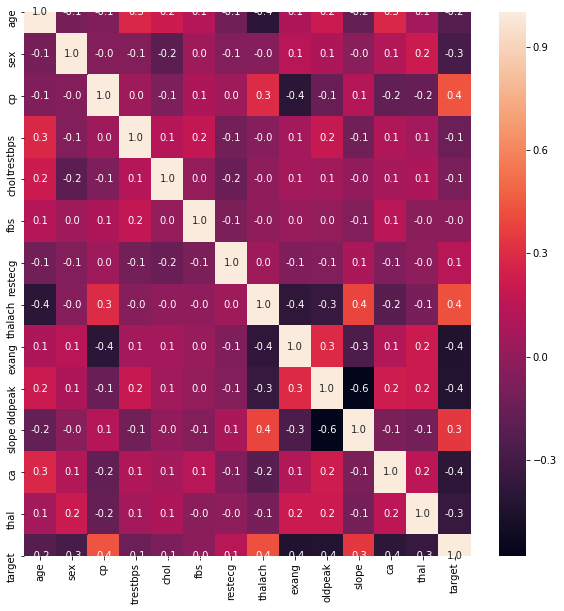

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True, fmt='0.1f')
plt.show()
# sns.heatmap(df.corr())

In [12]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

###### Barplot

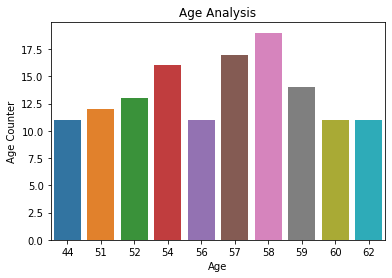

In [18]:
sns.barplot(x=df['age'].value_counts()[:10].index, y= df['age'].value_counts()[:10])
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis')
plt.show()

In [19]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

###### calculating the percentage of people who have heart disease

In [26]:
count_of_positiveheartdiseases = len(df[df['target'] == 1])
count_of_negativeheartdiseases = len(df[df['target'] == 0])
percentage_of_positiveheartdisease = count_of_positiveheartdiseases/len(df['target']) * 100
percentage_of_negativeheartdisease = count_of_negativeheartdiseases/len(df['target']) * 100
print("The percentage of people who have heart diseases is {:.2f} %" .format(percentage_of_positiveheartdisease))
print("The percentage of people who don't have heart diseases is {:.2f} %" .format(percentage_of_negativeheartdisease))


The percentage of people who have heart diseases is 54.46 %
The percentage of people who don't have heart diseases is 45.54 %


In [31]:
female = len(df[df['sex'] == 0])
male = len(df[df['sex'] == 1])
print("The percentage of females in this dataset is {:0.2f}".format(female/len(df['sex']) * 100))
print("The percentage of males in this dataset is {:0.2f}".format(male/len(df['sex']) * 100))

The percentage of females in this dataset is 31.68
The percentage of males in this dataset is 68.32


Age seems to have a connection. Higher the age, higher the chance of a heart disease

In [38]:
ages_29_to_40 = df[(df['age']>=29) & (df['age']<40)]
ages_40_to_55 = df[(df['age']>=40) & (df['age']<55)]
ages_55_and_above = df[(df['age']>=55)]
print(len(ages_29_to_40))
print(len(ages_40_to_55))
print(len(ages_55_and_above))

16
128
159


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1


In [39]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [40]:
df['target'].unique()

array([1, 0], dtype=int64)

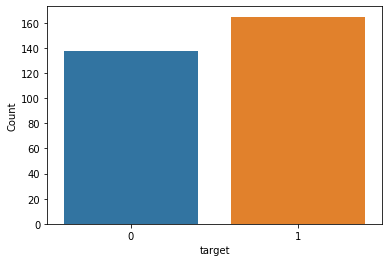

In [41]:
sns.countplot(df['target'])
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

# Model Building

## Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
x_data = df.drop(['target'],axis = 1)
y_data = df['target'].values
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.2, random_state = 0)

In [120]:
logi = LogisticRegression()
logi.fit(x_train,y_train)
logi_yhat = logi.predict(x_test)
print("Accuracy score is {:.2f}".format(logi.score(x_test,y_test)*100))

Accuracy score is 85.25


In [108]:
metrics.accuracy_score(y_test,logi_yhat)

0.8524590163934426

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
data = df.drop(['target'],axis = 1)
x1_data = np.asarray(data)
y1_data = np.asarray(df['target'])
x1_data = preprocessing.StandardScaler().fit(x1_data).transform(x1_data)
x1_data[0:10]
x_train, x_test, y_train, y_test = train_test_split(x1_data,y1_data, test_size = 0.2, random_state = 0)
logi1 = LogisticRegression()
logi1.fit(x_train,y_train)
logi1_yhat = logi.predict(x_test)
print("Accuracy score is {:.2f}".format(logi1.score(x_test,y_test)*100))

Accuracy score is 85.25


## KNN classifier

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
knnyhat = knn.predict(x_test)
print("KNN Accuracy is {:.2f}".format(knn.score(x_test,y_test)*100))

KNN Accuracy is 63.93


In [122]:
metrics.accuracy_score(y_test,knnyhat)

0.639344262295082

## Support Vector Machines

In [112]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
svm_yhat = svm.predict(x_test)
print("SVM Accuracy is {:.2f}".format(svm.score(x_test,y_test)*100))

SVM Accuracy is 86.89


In [113]:
metrics.accuracy_score(y_test,svm_yhat)

0.8688524590163934

## Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_yhat = nb.predict(x_test)
print("NB Accuracy is {:.2f}".format(nb.score(x_test,y_test)*100))

NB Accuracy is 85.25


In [115]:
metrics.accuracy_score(y_test,nb_yhat)

0.8524590163934426

## Random Forest Classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state =1)
rf.fit(x_train, y_train)
print("Random Forest Accuracy accuracy is {:.2f}".format(rf.score(x_test,y_test)*100))

Random Forest Accuracy accuracy is 85.25


## Decison Trees

In [117]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
dt.fit(x_train, y_train)
print("DecisionTreeClassifier accuracy is {:.2f}".format(dt.score(x_test,y_test)*100))

DecisionTreeClassifier accuracy is 75.41


In [95]:
dt_yhat = dt.predict(x_test)

In [96]:
y_test[0:10]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [97]:
dt_yhat[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)